In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot, plot_components
import seaborn as sns
from prophet import Prophet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("daily-total-female-births-CA.csv")
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


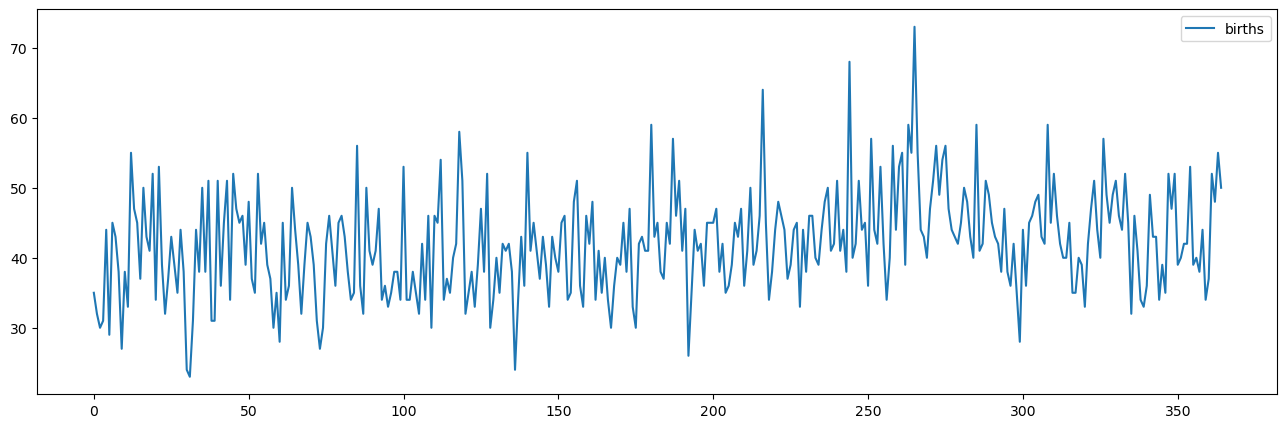

In [4]:
df.plot(figsize=(16,5))
plt.show()

Renaming column names of dataframe according to Prophet library req.

In [5]:
df.columns = ['ds', 'y']
df

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [6]:
# converting ds data type to datetime

df['ds'] = pd.to_datetime(df['ds'])

Since we don't have nulls, we proceed initiating the model.

In [7]:
# initialize the model
model = Prophet()

# fit the model to the data
model.fit(df)

04:31:39 - cmdstanpy - INFO - Chain [1] start processing
04:31:39 - cmdstanpy - INFO - Chain [1] done processing


Before making predictions, let's create a future DataFrame with the desired frequency and horizon.

In [8]:
# Create a future DataFrame for 12 months
future = model.make_future_dataframe(periods=2, freq='M')

# Generate the forecast
forecast = model.predict(future)

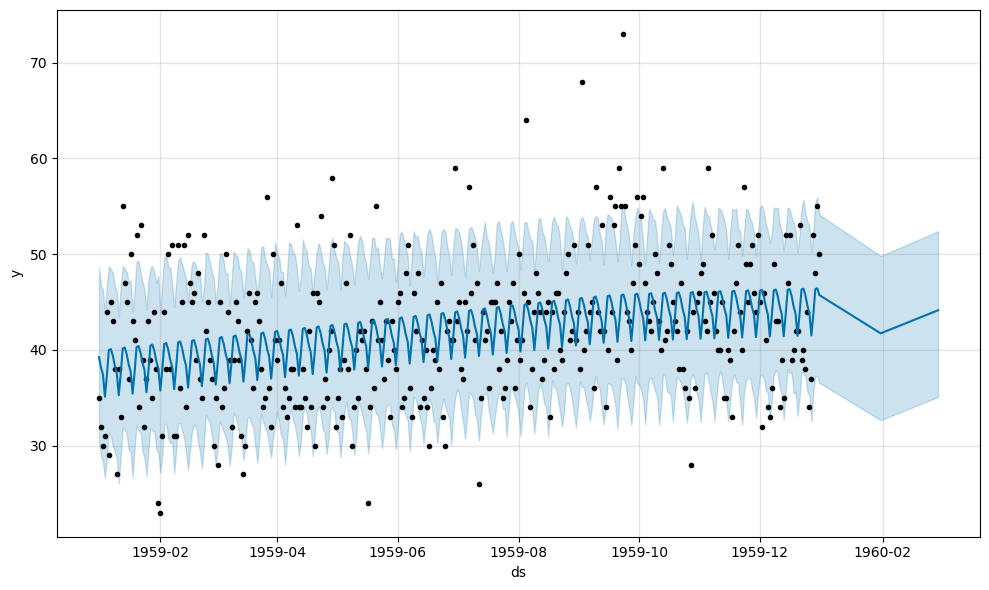

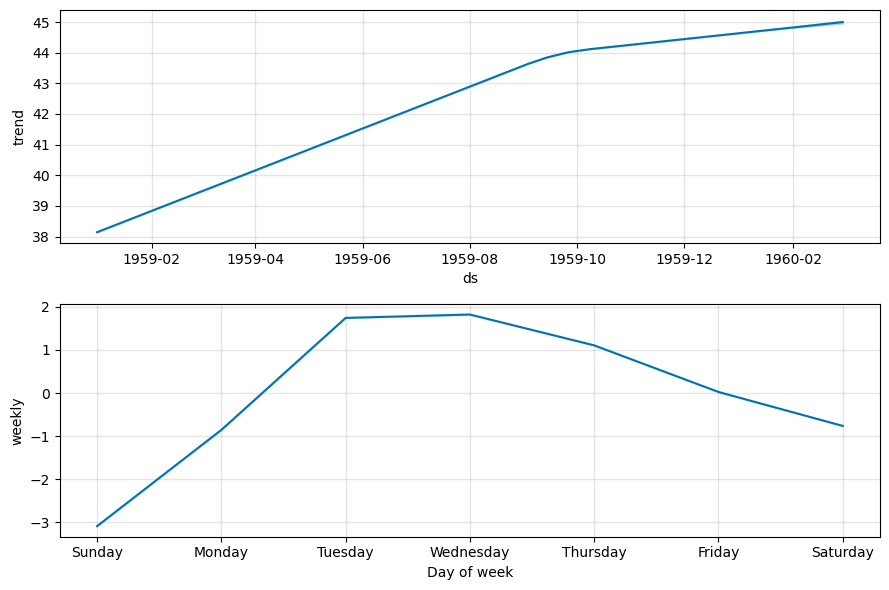

In [9]:
# Plot the forecast
plot(model, forecast)

# Plot the forecast components
plot_components(model, forecast)
plt.show()

In [10]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform cross-validation
df_cv = cross_validation(model, initial='245 days', period='30 days', horizon='60 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

  0%|          | 0/2 [00:00<?, ?it/s]

04:32:11 - cmdstanpy - INFO - Chain [1] start processing
04:32:11 - cmdstanpy - INFO - Chain [1] done processing
04:32:11 - cmdstanpy - INFO - Chain [1] start processing
04:32:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 6.36
Mean Squared Error: 60.43
Root Mean Squared Error: 7.77


### Hyperparameter Tuning

Improving our model's performance.

In [11]:
from prophet.diagnostics import cross_validation

In [12]:
# Define the hyperparameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1, 10, 30],
}


# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='245 days', period='30 days', horizon='60 days')
    return metric_func(df_cv['y'], df_cv['yhat'])


# Grid search
best_params = {}
best_score = float('inf')

for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
            model.fit(df)

            # Evaluate the model using Mean Absolute Error (MAE)
            score = evaluate_model(model, mean_absolute_error)

            # Update best parameters if necessary
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df)

04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:18 - cmdstanpy - INFO - Chain [1] start processing
04:32:18 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:19 - cmdstanpy - INFO - Chain [1] done processing
04:32:19 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:20 - cmdstanpy - INFO - Chain [1] start processing
04:32:20 - cmdstanpy - INFO - Chain [1] done processing
04:32:21 - cmdstanpy - INFO - Chain [1] start processing
04:32:21 - cmdstanpy - INFO - Chain [1] done processing


{'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1}
5.823889885951161
